Build a simple bot

- Define state structure with a list of HumanMessage objects
- Initialize model using LangChain library
- Send and handle different types of msgs
- Build and compile the graph of the Agent



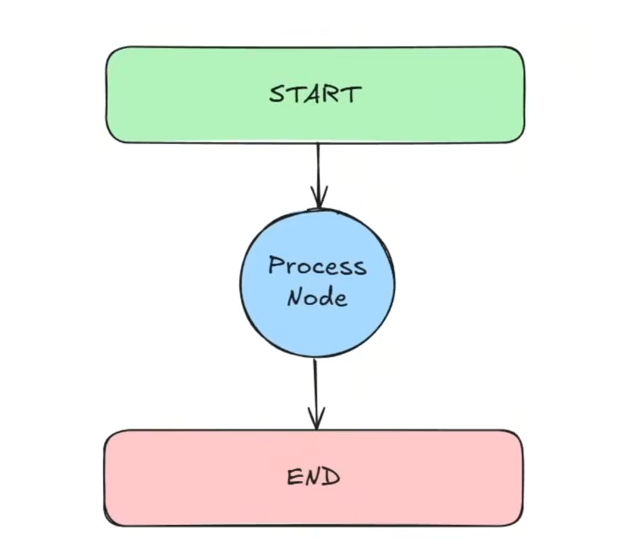

In [51]:
from IPython.display import Image, display

display(Image(filename='imgs/01_agents.png'))

In [52]:
from typing import TypedDict, List
from langchain_core.messages import HumanMessage
from langgraph.graph import StateGraph, START, END

from dotenv import load_dotenv
import os
load_dotenv()

GOOGLE_API_KEY = os.getenv("GOOGLE_GENAI_API_TOKEN")

In [53]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",  
    temperature=0,
    google_api_key=GOOGLE_API_KEY
)

# response = llm.invoke("¿What's the name of Tintin's dog?")
# print(response.content)


In [54]:
#TODO check what is the format of the AIresponse

# ¿Qué puedes hacer con este objeto?
#     Acceder a msg.content → el texto generado.
#     Ver detalles del modelo con msg.response_metadata.
#     Ver uso de tokens con msg.usage_metadata.
#     Serializar o guardar para análisis.

In [55]:
class AgentState(TypedDict):
    messages: List[HumanMessage] # messages sent by me

In [56]:
def process(state:AgentState) -> AgentState:
    """
    This node will send the msg to the LLM and returns the answer
    """
    response = llm.invoke(state["messages"])
    print(f"\nAI: {response.content}")
    return state

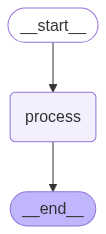

In [57]:
graph = StateGraph(AgentState)
graph.add_node("process", process)
graph.add_edge(START, "process")
graph.add_edge("process", END)

agent = graph.compile()

from IPython.display import Image, display
display(Image(agent.get_graph().draw_mermaid_png()))


In [58]:
user_input = input("Enter: ")

In [59]:
# agent.invoke({"messages": [HumanMessage(content=user_input)]})

In [60]:
while user_input != "exit":
    agent.invoke({"messages": [HumanMessage(content=user_input)]})
    user_input = input("Enter:")
